In [ ]:
#upload zip folder of dataset
from google.colab import files
uploaded = files.upload()


Saving DRONEDETECTIONDATASET.zip to DRONEDETECTIONDATASET.zip


In [ ]:
#Extract the contents of the ZIP.
!unzip DRONEDETECTIONDATASET.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/train/images/1681_jpg.rf.98ba66909e9f8569e1307f53033a290f.jpg  
 extracting: /content/train/images/1682_jpg.rf.912033766fc6cc26daa810c4c2d57f24.jpg  
 extracting: /content/train/images/1685_jpg.rf.9644404afc029e96c58d9778e2491cf6.jpg  
 extracting: /content/train/images/1686_jpg.rf.0509fc53ab8da8d0f5eb3888120c86ea.jpg  
 extracting: /content/train/images/1687_jpg.rf.1d08b673a26927b34f458d503b8810d6.jpg  
 extracting: /content/train/images/168_JPEG.rf.5a3dac3fed396e06df303c10f01c7d3d.jpg  
 extracting: /content/train/images/168_png.rf.4879e876f8fc143ea20d8224a1586f23.jpg  
 extracting: /content/train/images/1692_jpg.rf.057256f38966e20d83ec9e8975a76e24.jpg  
 extracting: /content/train/images/1693_jpg.rf.169120cb7f0ce889489d6ccc3d4b1659.jpg  
 extracting: /content/train/images/1694_jpg.rf.a0a107e984d90356933ec8c5d435db3a.jpg  
 extracting: /content/train/images/1695_jpg.rf.e23110cd2b59d6cc4a1d2512be853b9a.jpg  
 ext

In [ ]:
#Extracted files/folders alongside orignal zip folder
!ls /content/


data.yaml		   README.dataset.txt	sample_data  train
DRONEDETECTIONDATASET.zip  README.roboflow.txt	test	     valid


In [ ]:
#Print contents of data.yaml file
!cat /content/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Drone💀']

roboflow:
  workspace: drone-detection-g4d3g
  project: drone-detection-a1tsf
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/drone-detection-g4d3g/drone-detection-a1tsf/dataset/5

In [ ]:
#Imports the YOLO class from the Ultralytics library
!pip install ultralytics --quiet
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#Load pretained 'yolov8m' model
model = YOLO("yolov8m.pt")

In [ ]:
#Fine tune the model on train images
model.train( data="/content/data.yaml",
             epochs=50,
             imgsz=640,
             batch=16,
             name="Drone_Detection_New",
             workers=4,
             device = 0 )


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Drone_Detection_New, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/plotting.py:619: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/plotting.py:619: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/Drone_Detection_New
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      6.36G      1.508       1.84      1.764         25        640: 100% ━━━━━━━━━━━━ 133/133 1.9it/s 1:10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 2.2it/s 8.6s
                   all        608        525     0.0065      0.448    0.00516    0.00143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      6.54G      1.769      2.017      2.014         34        640

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:657: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:564: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:564: UserWarning: Glyph 128128 (\N

                   all        608        525      0.943      0.908      0.944      0.695
Speed: 0.2ms preprocess, 10.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/detect/Drone_Detection_New


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddfa217b020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#Path to saved optimised model
!ls /content/runs/detect/Drone_Detection_New/weights/

best.pt  last.pt


In [ ]:
#Download optimised model
from google.colab import files

# Use the full path to your trained model
files.download("/content/runs/detect/Drone_Detection_New/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Run detection on test images
results = model.predict(
    source='/content/test/images',
    save=True,
    imgsz=640,
    conf=0.25
)


image 1/305 /content/test/images/104_JPEG.rf.8589c99ebc9d155080ab90be403bbf00.jpg: 640x640 1 Drone💀, 37.0ms
image 2/305 /content/test/images/107_JPEG.rf.d4703affbc6cf8aa08e428d697a6b152.jpg: 640x640 1 Drone💀, 37.0ms
image 3/305 /content/test/images/10_JPEG.rf.869947a54d59706db96fac83ce4c4ffe.jpg: 640x640 2 Drone💀s, 36.9ms
image 4/305 /content/test/images/1102_jpg.rf.f14bb705911262bc50c77e550b921458.jpg: 640x640 1 Drone💀, 33.9ms
image 5/305 /content/test/images/1113_jpg.rf.1afa45134f03d615b93e5f0f0e81b04b.jpg: 640x640 1 Drone💀, 33.9ms
image 6/305 /content/test/images/111_JPEG.rf.dc6c4cf8421b820da564c0fa33b09dd5.jpg: 640x640 1 Drone💀, 33.9ms
image 7/305 /content/test/images/1120_jpg.rf.34be89d5db85a261f61e571f27c26e66.jpg: 640x640 1 Drone💀, 33.9ms
image 8/305 /content/test/images/1121_jpg.rf.17010245de205bf8db7006b8befa1003.jpg: 640x640 1 Drone💀, 24.6ms
image 9/305 /content/test/images/1141_jpg.rf.792cbaf57d83e87f6c569010aa089df0.jpg: 640x640 1 Drone💀, 21.4ms
image 10/305 /content/test/

In [69]:
# Validate on test set
metrics = model.val(
    data= "/content/data.yaml",
    split='test',
    imgsz=640,
    batch=16,
    conf=0.25,
    iou=0.6
)



Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 910.7±283.2 MB/s, size: 37.1 KB)
val: Scanning /content/test/labels.cache... 305 images, 70 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 305/305 559.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 2.4it/s 8.2s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:657: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:702: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:564: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:564: UserWarning: Glyph 128128 (\N

                   all        305        250      0.931      0.915      0.942       0.73
Speed: 2.3ms preprocess, 19.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val5


In [70]:
#content saved by YOLO in 'Drone_Detection_New'
!ls /content/runs/detect/Drone_Detection_New/


args.yaml			 labels.jpg	      train_batch5322.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
comprehensive_evaluation.png	 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5320.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5321.jpg  weights


In [51]:
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
#Print saved results
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLOv8 training results
results_path = "/content/runs/detect/Drone_Detection_New/results.csv"
df = pd.read_csv(results_path)

# Show first 5 rows to understand columns
df.head()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,78.5065,1.50800,1.84046,1.76372,0.00650,0.44762,0.00516,0.00143,2.63632,inf,12.22210,0.000662,0.000662,0.000662
1,2,162.2660,1.76890,2.01694,2.01429,0.05264,0.23238,0.03190,0.01126,2.35978,34.05200,3.15620,0.001302,0.001302,0.001302
2,3,242.2150,1.73776,1.97590,1.96692,0.00717,0.33524,0.00530,0.00132,2.76451,625.33900,4.05269,0.001916,0.001916,0.001916
3,4,322.7260,1.68246,1.88058,1.90718,0.52838,0.48381,0.48058,0.23413,1.72926,12.42090,2.13082,0.001881,0.001881,0.001881
4,5,403.9510,1.61462,1.77727,1.85017,0.42760,0.46530,0.37063,0.17612,1.83982,5.83315,2.44543,0.001842,0.001842,0.001842


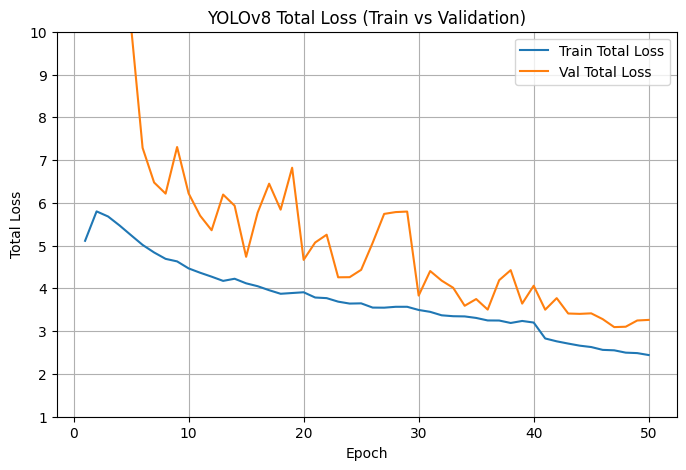

In [42]:
# Combine training losses / validation loss
df['train_total_loss'] = df['train/box_loss'] + df['train/cls_loss'] + df['train/dfl_loss']
df['val_total_loss'] = df['val/box_loss'] + df['val/cls_loss'] + df['val/dfl_loss']

# Plot total loss
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train_total_loss'], label='Train Total Loss')
plt.plot(df['epoch'], df['val_total_loss'], label='Val Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('YOLOv8 Total Loss (Train vs Validation)')
plt.legend()
plt.ylim(1, 10)
plt.grid(True)
plt.show()


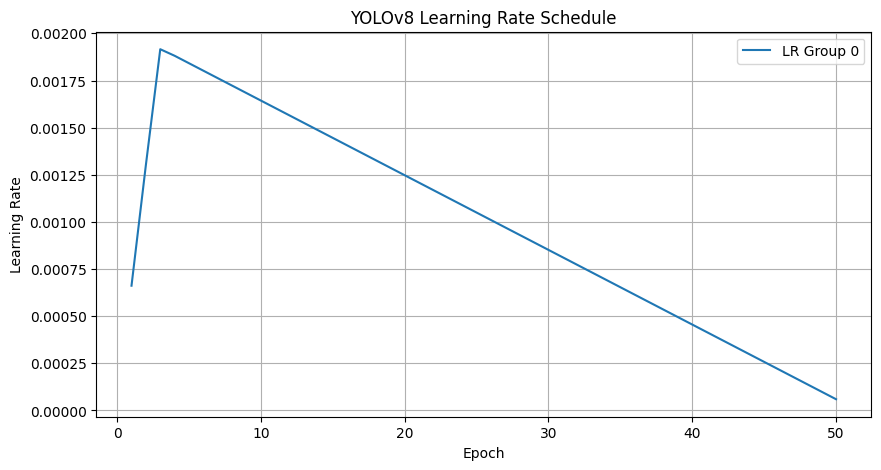

In [53]:
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['lr/pg0'], label='LR Group 0')
#plt.plot(df['epoch'], df['lr/pg1'], label='LR Group 1')
#plt.plot(df['epoch'], df['lr/pg2'], label='LR Group 2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('YOLOv8 Learning Rate Schedule')
plt.legend()

plt.grid(True)
plt.show()

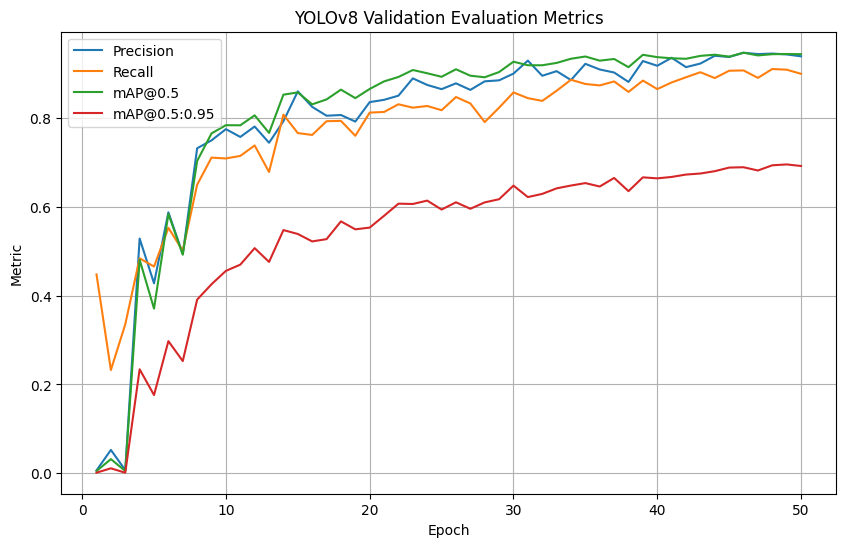

In [55]:
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('YOLOv8 Validation Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()

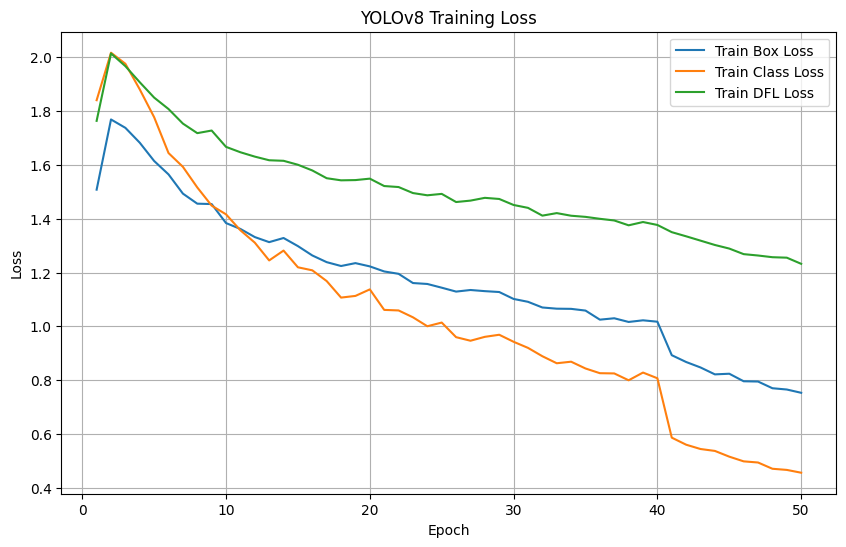

In [54]:
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('YOLOv8 Training Loss')
#plt.ylim(0, 5)  # Clip y-axis for better visualization
plt.legend()
plt.grid(True)
plt.show()


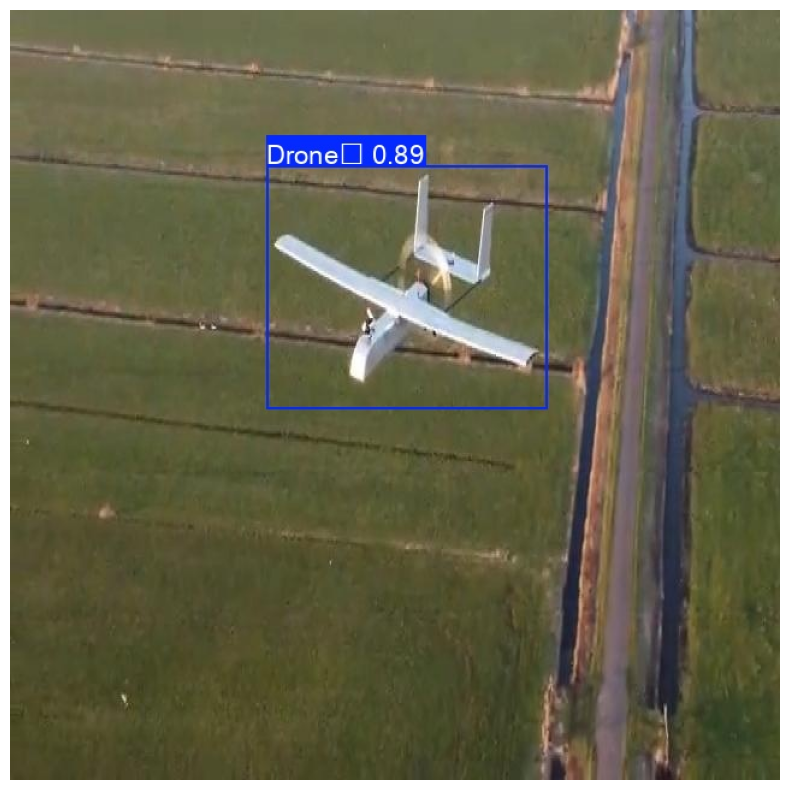

In [65]:
import cv2

# Load one of the predicted images
img_path = '/content/runs/detect/predict/youtube-79_jpg.rf.676e669a4ede2f94c5b6cec3e2b4be2f.jpg'  # replace with actual filename
img = cv2.imread(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
